<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/TankPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

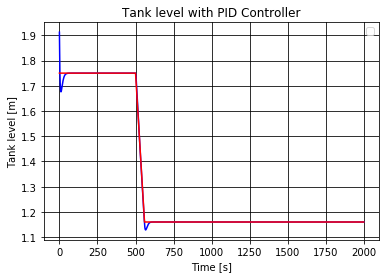

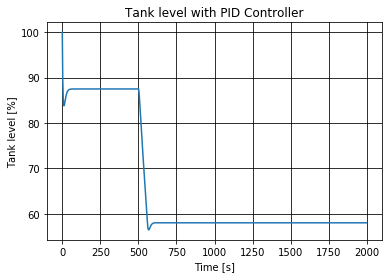

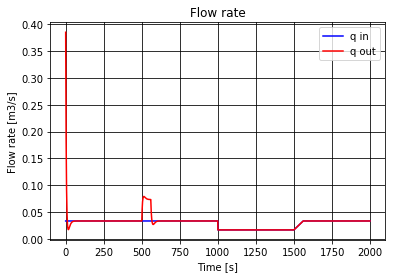

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ts=1
Tf=2000
qinn = 0.03333# [m3/s] (2000 l/min)
h=2#[m]
A=4 #[ m]
rho=1000
Kv=0.12
g=9.81
z=0.12 #Åpning ut

delta_z=0
e=0

# Only Implement PI controller
Kp=4
Ti = 0.3

qut=Kv*np.sqrt(g*h)


h_setp = 1.750
h_setp_old = h_setp

# min and max values
h_max = 2
h_min = 0
z_max = 1
z_min = 0
qinn_max = 0.04
qinn_min = 0

# store the data
h_ar =[0]
h_setp_ar =[0]
z_ar =[0]
y_ar =[0]
u_ar =[0]
ufb_ar =[0]
uff_ar =[0]
ufr_ar =[0]

qinn_ar = [0]
qut_ar = [0]
zff_ar = [0]
zfr_ar = [0]

#initial vaule of feedforward controller
uff = 0
ufr = 0

for i in range(0,Tf,Ts):
    #Update reference
    if (i > 0.25*Tf) and (i < (0.25*Tf)+60):
        h_setp = h_setp - 0.01
    
    #Update disturbance
    if (i >= 0.5*Tf) and (i < 0.75*Tf):
        qinn = 0.01667# [m3/s] (1000 l/min)
    
    if (i >= 0.75*Tf) and (i < (0.75*Tf)+60):
        qinn = qinn+ 0.0002777# [m3/s] (ramp up by 1000
    
    if i >= ((0.75*Tf)+60):
        qinn = 0.03333# [m3/s] (2000 l/min)
    
    # calculate z feed forward disturbance
    zff = qinn/(Kv*np.sqrt(g*h_setp))
    
    #calculate z feed forward reference
    zfr = (A*(h_setp_old-h_setp)/Ts)/(Kv*np.sqrt(rho*g*h_setp))
    h_setp_old = h_setp
    
    #scale process variables to controller
    r = ((h_setp-h_min)/h_max)*100.0 # reference
    y = ((h-h_min)/h_max)*100.0 # controlled variabl
    u = ((z-z_min)/z_max)*100.0 # manipulated varia
    uff_new = ((zff-z_min)/z_max)*100.0 # manipulat
    ufr_new = ((zfr-z_min)/z_max)*100.0 # manipulat
    
    #Store previous values
    last_e = e
    e=y-r #feedback error
    ufb = u-uff-ufr
    
    #PI Controller
    delta_u=Kp*(e-last_e)+(Ti*Ts)*e
    ufb=ufb+delta_u
    
    uff = uff_new # comment update if ff dist is off
    ufr = ufr_new # comment update if ff ref is off
    
    #PI controller+feed forward controller
    u = ufb +uff + ufr #( feedback + ff dist + ff ref)
    
    if u<=0:
        u=0

    if u>100:
        u=100
    
    #scale controller variables to process
    z = z_min + z_max*(u/100.0)
    
    #simulere med ny regulatorsetting (z)
    qut=z*Kv*np.sqrt(g*h)
    deltah=(1/A)*(qinn*Ts-qut*Ts)
    h=h+deltah
    # verify min,max levels in tank
    if h<=0:
        h=0

    if h>2:
        h=2
    
    #store to arrays
    h_ar=np.concatenate([h_ar,np.array([h])])
    h_setp_ar=np.concatenate([h_setp_ar,np.array([h_setp])])
    z_ar=np.concatenate([z_ar,np.array([z])])
    zff_ar=np.concatenate([zff_ar,np.array([zff])])
    zfr_ar=np.concatenate([zfr_ar,np.array([zfr])])
    y_ar=np.concatenate([y_ar,np.array([y])])
    u_ar=np.concatenate([u_ar,np.array([u])])
    ufb_ar=np.concatenate([ufb_ar,np.array([ufb])])
    uff_ar=np.concatenate([uff_ar,np.array([uff])])
    ufr_ar=np.concatenate([ufr_ar,np.array([ufr])])
    qinn_ar=np.concatenate([qinn_ar,np.array([qinn])])
    qut_ar=np.concatenate([qut_ar,np.array([qut])])

h_ar=np.delete(h_ar,0)
h_setp_ar=np.delete(h_setp_ar,0)
z_ar=np.delete(z_ar,0)
zff_ar=np.delete(zff_ar,0)
zfr_ar=np.delete(zfr_ar,0)
y_ar=np.delete(y_ar,0)
u_ar=np.delete(u_ar,0)
ufb_ar=np.delete(ufb_ar,0)
uff_ar=np.delete(uff_ar,0)
ufr_ar=np.delete(ufr_ar,0)
qinn_ar=np.delete(qinn_ar,0)
qut_ar=np.delete(qut_ar,0)


plt.figure(1)
plt.plot(np.arange(0,Tf,Ts),h_ar,'b')
plt.plot(np.arange(0,Tf,Ts),h_setp_ar,'r')
plt.legend('Actual','Reference')
plt.xlabel('Time [s]')
plt.ylabel('Tank level [m]')
plt.title('Tank level with PID Controller')
plt.grid(color='k')


plt.figure(2)
plt.plot(y_ar)
plt.xlabel('Time [s]')
plt.ylabel('Tank level [%]')
plt.title('Tank level with PID Controller')
plt.grid(color='k')

plt.figure(3)
plt.plot(np.arange(0,Tf,Ts),qinn_ar,'b')
plt.plot(np.arange(0,Tf,Ts),qut_ar,'r')
plt.legend(['q in','q out'])
plt.xlabel('Time [s]')
plt.ylabel('Flow rate [m3/s]')
plt.title('Flow rate')
plt.grid(color='k')